In [6]:
import random

import numpy as np
import matplotlib.pyplot as plt
import time
import gym
import math

In [7]:

class Q_Learning:

    def __init__(self,env,alpha,gamma,epsilon,numberEpisodes,bins,lowerBounds,upperBounds):

        self.env=env
        self.alpha=alpha
        self.gamma=gamma
        self.epsilon=epsilon
        self.action=env.action_space.n
        self.numberEpisodes=numberEpisodes
        self.bins=bins
        self.lowerBounds=lowerBounds
        self.upperBounds=upperBounds

        self.sumRewardsEpisode=[]

        self.q_table=np.random.uniform(low=0, high=1, size=(bins[0],bins[1],bins[2],bins[3],self.action))


    def State_Index(self,state):

        x = state[0]
        x_dot = state[1]
        theta = state[2]
        theta_dot = state[3]

        # Evenly spaced bins between lowerBounds and upperBounds
        x_Bin = np.linspace(self.lowerBounds[0],self.upperBounds[0],self.bins[0])
        x_dot_bin = np.linspace(self.lowerBounds[1],self.upperBounds[1],self.bins[1])
        theta_bin = np.linspace(self.lowerBounds[2],self.upperBounds[2],self.bins[2])
        theta_dot_bin = np.linspace(self.lowerBounds[3],self.upperBounds[3],self.bins[3])

        # Returns the index of the bins to which each value in input array belongs
        x_index = np.maximum(np.digitize(state[0],x_Bin)-1,0)
        x_dot_index = np.maximum(np.digitize(state[1],x_dot_bin)-1,0)
        theta_index = np.maximum(np.digitize(state[2],theta_bin)-1,0)
        theta_dot_index = np.maximum(np.digitize(state[3],theta_dot_bin)-1,0)

        # A tuple holding the indices of each bin for each state
        return tuple([x_index,x_dot_index,theta_index,theta_dot_index])


    def Action_Move(self,state,index):

        r = np.random.random()

        if r < self.epsilon:

            return np.random.choice(self.action)

        else:

            return np.random.choice(np.where(self.q_table[self.State_Index(state)]==np.max(self.q_table[self.State_Index(state)]))[0])


    def simulation(self):

        for episode in range(self.numberEpisodes):

            episodicRewards = []

            (curr_state,_) = self.env.reset()
            curr_state = list(curr_state)

            print("Simulating episode {}".format(episode))

            terminal_state=False

            while not terminal_state:

                curr_state_index = self.State_Index(curr_state)

                action = self.Action_Move(curr_state,episode)

                (next_state, reward, terminal_state,_,_) = self.env.step(action)

                episodicRewards.append(reward)

                next_state = list(next_state)

                next_state_index = self.State_Index(next_state)

                q_Max = np.max(self.q_table[next_state_index])

                if not terminal_state:

                    error=reward+self.gamma*q_Max-self.q_table[curr_state_index+(action,)]
                    self.q_table[curr_state_index+(action,)]=self.q_table[curr_state_index+(action,)]+self.alpha*error

                else:

                    error=reward-self.q_table[curr_state_index+(action,)]
                    self.q_table[curr_state_index+(action,)]=self.q_table[curr_state_index+(action,)]+self.alpha*error

                curr_state=next_state

            print("Sum of rewards {}".format(np.sum(episodicRewards)))
            self.sumRewardsEpisode.append(np.sum(episodicRewards))


    def optimal_Policy(self):

        env1 = gym.make('CartPole-v1',render_mode='human')
        (currentState,_) = env1.reset()
        env1.render()
        timeSteps = 1000
        obtainedRewards = []

        for timeIndex in range(timeSteps):

            print(timeIndex)

            curr_state_Action = np.random.choice(np.where(self.q_table[self.State_Index(currentState)]==np.max(self.q_table[self.State_Index(currentState)]))[0])

            currentState, reward, terminated, truncated, info = env1.step(curr_state_Action)

            obtainedRewards.append(reward)

            time.sleep(0.05)

            if (terminated):

                time.sleep(1)
                break

        return obtainedRewards,env1

In [13]:
env = gym.make('CartPole-v1')
(state,_) = env.reset()

upperBounds = env.observation_space.high
lowerBounds = env.observation_space.low
x_dot_min = -4
x_dot_max = 4
theta_dot_min = -3*math.pi
theta_dot_max = 3*math.pi
upperBounds[1] = x_dot_max
upperBounds[3] = theta_dot_max
lowerBounds[1] = x_dot_min
lowerBounds[3] = theta_dot_min

x_bin = 50
x_dot_bin = 50
theta_bin = 50
theta_dot_bin = 50
bins = [x_bin,x_dot_bin,theta_bin,theta_dot_bin]

epsilon = 0.05
alpha = 0.1
gamma = 0.9
numberOfEpisodes = 500

Q1 = Q_Learning(env,alpha,gamma,epsilon,numberOfEpisodes,bins,lowerBounds,upperBounds)

Q1.simulation()



Simulating episode 0
Sum of rewards 17.0
Simulating episode 1
Sum of rewards 24.0
Simulating episode 2
Sum of rewards 14.0
Simulating episode 3
Sum of rewards 12.0
Simulating episode 4
Sum of rewards 21.0
Simulating episode 5
Sum of rewards 33.0
Simulating episode 6
Sum of rewards 12.0
Simulating episode 7
Sum of rewards 13.0
Simulating episode 8
Sum of rewards 12.0
Simulating episode 9
Sum of rewards 14.0
Simulating episode 10
Sum of rewards 13.0
Simulating episode 11
Sum of rewards 21.0
Simulating episode 12
Sum of rewards 10.0
Simulating episode 13
Sum of rewards 22.0
Simulating episode 14
Sum of rewards 15.0
Simulating episode 15
Sum of rewards 11.0
Simulating episode 16
Sum of rewards 18.0
Simulating episode 17
Sum of rewards 11.0
Simulating episode 18
Sum of rewards 12.0
Simulating episode 19
Sum of rewards 13.0
Simulating episode 20
Sum of rewards 17.0
Simulating episode 21
Sum of rewards 39.0
Simulating episode 22
Sum of rewards 12.0
Simulating episode 23
Sum of rewards 10.0
Si

In [14]:

(obtainedRewardsOptimal,env1) = Q1.optimal_Policy()

0
1
2
3
4
5
6
7
8
9
10
11


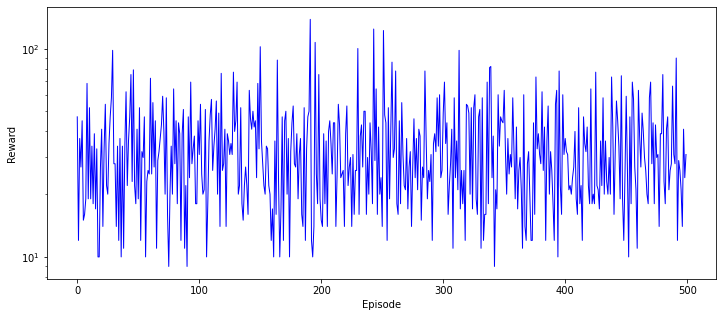

In [12]:
plt.figure(figsize = (12, 5))
plt.plot(Q1.sumRewardsEpisode,color='blue',linewidth=1)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.yscale('log')
plt.show()

In [3]:
def state_idx(position,angle,velocity,angularvelocity):
     # if position>=-4.8 and position<-2.4:
     #     if angle>=-4.2 and  angle<-2.115:
     #         return 0
     #     elif angle>=-2.115 and angle<-0.01:
     #         return 1
     #     elif angle>=-0.01 and angle< 0.2095:
     #         return 2
     #     else:
     #         return 3
     # elif position>=-2.4 and position<0:
     #     if angle>=-4.2 and  angle<-2.115:
     #         return 4
     #     elif angle>=-2.115 and angle<-0.01:
     #         return 5
     #     elif angle>=-0.01 and angle< 0.2095:
     #         return 6
     #     else:
     #         return 7
     # elif position>=0 and position<2.4:
     #     if angle>=-4.2 and  angle<-2.115:
     #         return 8
     #     elif angle>=-2.115 and angle<-0.01:
     #         return 9
     #     elif angle>=-0.01 and angle< 0.2095:
     #         return 10
     #     else:
     #         return 11
     # else:
     #     if angle >= -4.2 and angle < -2.115:
     #         return 12
     #     elif angle >= -2.115 and angle < -0.01:
     #         return 13
     #     elif angle >= -0.01 and angle < 0.2095:
     #         return 14
     #     else:
     #         return 15
     if position>2.4 or position<-2.4 or angle>0.2095 or angle<-0.2095:
         return 0
     elif position<=2.4 and position>1.2:
         if angle<=0.2095 and angle>0.10475:
             if velocity<=2 and velocity>1:
                  if angularvelocity<=3 and angularvelocity>1.5:
                      return 1
                  elif angularvelocity<=1.5 and angularvelocity>0:
                      return 2
                  elif angularvelocity<=0 and angularvelocity>-1.5:
                      return 3
                  else:
                      return 4
             elif velocity<=1 and velocity>0:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 5
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 6
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 7
                 else:
                     return 8
             elif velocity<=0 and velocity>-1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 9
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 10
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 11
                 else:
                     return 12
             else:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 13
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 14
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 15
                 else:
                     return 16
         elif angle <=0.10475 and angle>0:
             if velocity <= 2 and velocity > 1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 17
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 18
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 19
                 else:
                     return 20
             elif velocity <= 1 and velocity > 0:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 21
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 22
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 23
                 else:
                     return 24
             elif velocity <= 0 and velocity > -1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 25
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 26
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 27
                 else:
                     return 28
             else:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 29
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 30
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 31
                 else:
                     return 32
         elif angle<=0 and  angle>-0.10475:
             if velocity <= 2 and velocity > 1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 33
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 34
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 35
                 else:
                     return 36
             elif velocity <= 1 and velocity > 0:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 37
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 38
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 39
                 else:
                     return 40
             elif velocity <= 0 and velocity > -1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 41
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 42
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 43
                 else:
                     return 44
             else:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 45
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 46
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 47
                 else:
                     return 48
         else:
             if velocity <= 2 and velocity > 1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 49
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 50
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 51
                 else:
                     return 52
             elif velocity <= 1 and velocity > 0:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 53
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 54
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 55
                 else:
                     return 56
             elif velocity <= 0 and velocity > -1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 57
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 58
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 59
                 else:
                     return 60
             else:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 61
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 62
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 63
                 else:
                     return 64
     elif position <= 1.2 and position > 0:
         if angle <= 0.2095 and angle > 0.10475:
             if velocity<=2 and velocity>1:
                  if angularvelocity<=3 and angularvelocity>1.5:
                      return 65
                  elif angularvelocity<=1.5 and angularvelocity>0:
                      return 66
                  elif angularvelocity<=0 and angularvelocity>-1.5:
                      return 67
                  else:
                      return 68
             elif velocity<=1 and velocity>0:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 69
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 70
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 71
                 else:
                     return 72
             elif velocity<=0 and velocity>-1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 73
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 74
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 75
                 else:
                     return 76
             else:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 77
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 78
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 79
                 else:
                     return 80
         elif angle <= 0.10475 and angle > 0:
             if velocity <= 2 and velocity > 1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 81
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 82
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 83
                 else:
                     return 84
             elif velocity <= 1 and velocity > 0:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 85
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 86
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 87
                 else:
                     return 88
             elif velocity <= 0 and velocity > -1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 89
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 90
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 91
                 else:
                     return 92
             else:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 93
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 94
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 95
                 else:
                     return 96
         elif angle <= 0 and angle > -0.10475:
             if velocity <= 2 and velocity > 1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 97
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 98
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 99
                 else:
                     return 100
             elif velocity <= 1 and velocity > 0:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 101
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 102
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 103
                 else:
                     return 104
             elif velocity <= 0 and velocity > -1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 105
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 106
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 107
                 else:
                     return 108
             else:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 109
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 110
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 111
                 else:
                     return 112
         else:
             if velocity <= 2 and velocity > 1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 113
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 114
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 115
                 else:
                     return 116
             elif velocity <= 1 and velocity > 0:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 117
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 118
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 119
                 else:
                     return 120
             elif velocity <= 0 and velocity > -1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 121
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 122
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 123
                 else:
                     return 124
             else:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 125
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 126
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 127
                 else:
                     return 128
     elif position <= 0 and position > -1.2:
         if angle <= 0.2095 and angle > 0.10475:
             if velocity <= 2 and velocity > 1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 129
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 130
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 131
                 else:
                     return 132
             elif velocity <= 1 and velocity > 0:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 133
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 134
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 135
                 else:
                     return 136
             elif velocity <= 0 and velocity > -1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 137
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 138
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 139
                 else:
                     return 140
             else:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 141
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 142
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 143
                 else:
                     return 144
         elif angle <= 0.10475 and angle > 0:
             if velocity <= 2 and velocity > 1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 145
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 146
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 147
                 else:
                     return 148
             elif velocity <= 1 and velocity > 0:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 149
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 150
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 151
                 else:
                     return 152
             elif velocity <= 0 and velocity > -1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 153
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 154
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 155
                 else:
                     return 156
             else:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 157
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 158
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 159
                 else:
                     return 160
         elif angle <= 0 and angle > -0.10475:
             if velocity <= 2 and velocity > 1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 161
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 162
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 163
                 else:
                     return 164
             elif velocity <= 1 and velocity > 0:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 165
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 166
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 167
                 else:
                     return 168
             elif velocity <= 0 and velocity > -1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 169
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 170
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 171
                 else:
                     return 172
             else:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 173
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 174
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 175
                 else:
                     return 176
         else:
             if velocity <= 2 and velocity > 1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 177
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 178
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 179
                 else:
                     return 180
             elif velocity <= 1 and velocity > 0:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 181
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 182
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 183
                 else:
                     return 185
             elif velocity <= 0 and velocity > -1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 186
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 187
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 188
                 else:
                     return 189
             else:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 190
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 191
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 192
                 else:
                     return 193
     else:
         if angle <= 0.2095 and angle > 0.10475:
             if velocity <= 2 and velocity > 1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 194
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 195
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 196
                 else:
                     return 197
             elif velocity <= 1 and velocity > 0:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 198
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 199
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 200
                 else:
                     return 201
             elif velocity <= 0 and velocity > -1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 202
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 203
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 204
                 else:
                     return 205
             else:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 206
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 207
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 208
                 else:
                     return 209
         elif angle <= 0.10475 and angle > 0:
             if velocity <= 2 and velocity > 1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 210
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 211
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 212
                 else:
                     return 213
             elif velocity <= 1 and velocity > 0:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 214
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 215
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 216
                 else:
                     return 217
             elif velocity <= 0 and velocity > -1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 218
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 219
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 220
                 else:
                     return 221
             else:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 222
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 223
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 224
                 else:
                     return 225
         elif angle <= 0 and angle > -0.10475:
             if velocity<=2 and velocity>1:
                  if angularvelocity<=3 and angularvelocity>1.5:
                      return 226
                  elif angularvelocity<=1.5 and angularvelocity>0:
                      return 227
                  elif angularvelocity<=0 and angularvelocity>-1.5:
                      return 228
                  else:
                      return 229
             elif velocity<=1 and velocity>0:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 230
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 231
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 232
                 else:
                     return 233
             elif velocity<=0 and velocity>-1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 234
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 235
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 236
                 else:
                     return 237
             else:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 238
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 239
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 240
                 else:
                     return 241
         else:
             if velocity <= 2 and velocity > 1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 242
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 243
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 244
                 else:
                     return 245
             elif velocity <= 1 and velocity > 0:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 246
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 247
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 248
                 else:
                     return 249
             elif velocity <= 0 and velocity > -1:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 250
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 251
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 252
                 else:
                     return 253
             else:
                 if angularvelocity <= 3 and angularvelocity > 1.5:
                     return 254
                 elif angularvelocity <= 1.5 and angularvelocity > 0:
                     return 255
                 elif angularvelocity <= 0 and angularvelocity > -1.5:
                     return 256
                 else:
                     return 257

In [9]:
import random
env=gym.make('CartPole-v1')
random.seed(113)
qtable=np.random.rand(258,2)
qtable[0][0]=0
qtable[0][1]=0
episode=1
epsilone=0.05
#rewards=[]
#print(qtable)
for _ in range(500):
    state,info = env.reset()
    #print(state[0],state[2])
    run=0
    totalreward=0
    while(True):
      action=-1

      st_idx = state_idx(state[0], state[2],state[1],state[3])

      #print(state[0],state[2],st_idx)
      if np.random.rand()<epsilone:
         action=random.randrange(0,2,1)
      else:
        action=np.argmax(qtable[st_idx])
      #print(action)

      state_next, reward, terminated, truncated, info = env.step(action)
      totalreward+=reward
      state_next_idx=state_idx(state_next[0],state_next[2],state_next[1],state_next[3])
      #print(st_idx)
      run += 1
      if  terminated:
          qtable[st_idx][action] = qtable[st_idx][action] + 0.1 * (reward- qtable[st_idx][action])
          #print(state_next[0],state_next[2])
          print('Episode',episode,':')
          #print()
          #print('Qtable:')
          #print()
 #         print('left','right')
  #        print(qtable)
          print()
         # print('Runs',run)
          print('Reward:',totalreward)
          print('.........')
          break


      #print(np.max(qtable[state_next_idx]))
      qtable[st_idx][action]=qtable[st_idx][action]+0.1*(reward+np.max(qtable[state_next_idx])-qtable[st_idx][action])
      state=state_next
      #print(state_next[1],state_next[3])

      #print(state_next,reward)

    episode+=1

env.close()

Episode 1 :

Reward: 109.0
.........
Episode 2 :

Reward: 12.0
.........
Episode 3 :

Reward: 10.0
.........
Episode 4 :

Reward: 10.0
.........
Episode 5 :

Reward: 11.0
.........
Episode 6 :

Reward: 11.0
.........
Episode 7 :

Reward: 153.0
.........
Episode 8 :

Reward: 9.0
.........
Episode 9 :

Reward: 11.0
.........
Episode 10 :

Reward: 138.0
.........
Episode 11 :

Reward: 10.0
.........
Episode 12 :

Reward: 10.0
.........
Episode 13 :

Reward: 144.0
.........
Episode 14 :

Reward: 136.0
.........
Episode 15 :

Reward: 10.0
.........
Episode 16 :

Reward: 10.0
.........
Episode 17 :

Reward: 13.0
.........
Episode 18 :

Reward: 204.0
.........
Episode 19 :

Reward: 20.0
.........
Episode 20 :

Reward: 85.0
.........
Episode 21 :

Reward: 12.0
.........
Episode 22 :

Reward: 154.0
.........
Episode 23 :

Reward: 10.0
.........
Episode 24 :

Reward: 10.0
.........
Episode 25 :

Reward: 19.0
.........
Episode 26 :

Reward: 24.0
.........
Episode 27 :

Reward: 93.0
.........
Epis